# Lab 8: Define and Solve an ML Problem of Your Choosing

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [4]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

#load data and save in DataFrame df
df =  pd.read_csv('WHR2018Chapter2OnlineData.csv', header=0)# YOUR CODE HERE

#display the first few row of df
df.head(15)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Answer:
1. For this project I choose "WHR2018Chapter2OnlineData.csv". The dataset includes various socio-economic indicators for different countries over the years, including metrics such as Life Ladder, GDP per capita, social support, life expectancy, and others.
2. The label will be 'Life Ladder' which mean Happiness. I will be predicting how companies can use well-being predictions to understand potential markets better. Specifically, I aim to determine if selling a product, such as those offered by Starbucks, would be viable in areas with different well-being levels. For example, in Moldova, where Starbucks does not currently exist, we can use well-being data to assess whether it is worth investing in this country like Moldova.
3. This is a supervised learning  and regression problem.
4. The features for this prediction include:
- Log GDP per capita
- Social support
- Healthy life expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Positive affect
- Negative affect
- Confidence in national government
- Democratic Quality
- Delivery Quality
- Standard deviation of ladder by country-year
- Standard deviation/Mean of ladder by country-year
- GINI index (World Bank estimate)
- GINI index (World Bank estimate), average 2000-15
- Gini of household income reported in Gallup, by wp5-year

5. Understanding the potential of a new market is crucial for businesses, especially those offering  products like Starbucks. By predicting well-being, companies can make informed decisions about market entry and expansion. This approach ensures that investments are strategically placed in regions where there is a higher likelihood of success, thus optimizing resources and maximizing returns.
By analyzing the well-being data, Starbucks can determine if Moldova or other country has the economic stability and consumer confidence necessary for a luxury brand to thrive. For example, understanding local well-being can help Starbucks tailor its product offerings and marketing strategies to suit the tastes and preferences of Moldovan consumers. Predicting the future trajectory of well-being in Moldova can help Starbucks assess the long-term potential of the market, guiding their decision on whether to invest now or wait for more favorable conditions.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

# Inspect the Data

In [5]:
#Display the shape of df- numbers of rows and columns
df.shape

(1562, 19)

In [6]:
#Display column names
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [7]:
#Get information about data set such data type of all columns
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

# Prepare Data

In [8]:
#Display summury statistic of numerical columns
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [9]:
# Renaming columns
df.rename(columns={'Life Ladder': 'Happiness', 
                   'Healthy life expectancy at birth': 'Life Expectancy', 
                   'Freedom to make life choices': 'Freedom Choices', 
                   'Confidence in national government': 'Gov confidence',
                   'Log GDP per capita': 'LogGDP', 'Perceptions of corruption' : 'Corruption'}, inplace=True)


In [10]:
df.head()

,country,year,Happiness,LogGDP,Social support,Life Expectancy,Freedom Choices,Generosity,Corruption,Positive affect,Negative affect,Gov confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


Remove columns that are not relevant to our analysis.

In [11]:
#Remove columns that are not relevant to our analysis.
df.drop(columns= ['year'], inplace= True)

In [12]:
df.head()

,country,Happiness,LogGDP,Social support,Life Expectancy,Freedom Choices,Generosity,Corruption,Positive affect,Negative affect,Gov confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


# Handle Missing Data

In [13]:
#check missing value in each column
nan_count=np.sum(df.isnull(), axis=0)
nan_count

country                                                       0
Happiness                                                     0
LogGDP                                                       27
Social support                                               13
Life Expectancy                                               9
Freedom Choices                                              29
Generosity                                                   80
Corruption                                                   90
Positive affect                                              18
Negative affect                                              12
Gov confidence                                              161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by country-year             0
GINI index (World Bank estimate)        

In [14]:
nan_detected= nan_count!=0
nan_detected

country                                                     False
Happiness                                                   False
LogGDP                                                       True
Social support                                               True
Life Expectancy                                              True
Freedom Choices                                              True
Generosity                                                   True
Corruption                                                   True
Positive affect                                              True
Negative affect                                              True
Gov confidence                                               True
Democratic Quality                                           True
Delivery Quality                                             True
Standard deviation of ladder by country-year                False
Standard deviation/Mean of ladder by country-year           False
GINI index

In [15]:
#display list of collumns who have missing value
to_impute = nan_detected
df.columns[to_impute]


Index(['LogGDP', 'Social support', 'Life Expectancy', 'Freedom Choices',
       'Generosity', 'Corruption', 'Positive affect', 'Negative affect',
       'Gov confidence', 'Democratic Quality', 'Delivery Quality',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [16]:
#create a variable that have all columns with missing data
columns_to_fill = [
       'LogGDP', 'Social support', 'Life Expectancy', 'Freedom Choices',
       'Generosity', 'Corruption', 'Positive affect',
       'Negative affect', 'Gov confidence', 'Democratic Quality',
       'Delivery Quality', 'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'
]

In [17]:
# Create a subset DataFrame with only the columns of interest
subset_df = df[columns_to_fill]

In [18]:
#Calculate the mean values for these columns
mean_of_columns= subset_df.mean()


In [19]:
# Replace missing values with mean values of the columns
df[columns_to_fill] = subset_df.fillna(value=mean_of_columns)

In [20]:
#np.sum(df.isnull(), axis=0)
df.describe()

,Happiness,LogGDP,Social support,Life Expectancy,Freedom Choices,Generosity,Corruption,Positive affect,Negative affect,Gov confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,1.121017,1.173750,0.118872,7.937689,0.144051,0.159939,0.180110,0.107021,0.083682,0.180621,0.824041,0.925759,0.379684,0.119007,0.052884,0.078834,0.092575
min,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,4.606351,8.330659,0.749794,57.344959,0.635676,-0.108292,0.702761,0.622581,0.204680,0.348685,-0.713479,-0.671931,1.737934,0.309722,0.372846,0.327250,0.386856
50%,5.332600,9.361684,0.831776,63.763542,0.744320,-0.011797,0.798041,0.715595,0.252504,0.480207,-0.126617,-0.084389,1.960345,0.369751,0.372846,0.386948,0.445204
75%,6.271025,10.167549,0.904097,68.064693,0.841122,0.086098,0.874675,0.799524,0.310713,0.593869,0.504140,0.606049,2.215920,0.451833,0.372846,0.429250,0.480072
max,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [21]:
df.columns

Index(['country', 'Happiness', 'LogGDP', 'Social support', 'Life Expectancy',
       'Freedom Choices', 'Generosity', 'Corruption', 'Positive affect',
       'Negative affect', 'Gov confidence', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

# Detect Outliers

Clean data by detecting outlier using statistics method

In [22]:
#replace outliers in data using winsorization
columns_to_winsorize = ['country', 'Happiness', 'LogGDP', 'Social support', 'Life Expectancy',
       'Freedom Choices', 'Generosity', 'Corruption',
       'Positive affect', 'Negative affect', 'Gov confidence',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation/Mean of ladder by country-year',
        'Standard deviation of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year']

for column in columns_to_winsorize:
    data = df[column].values  # Convert to numpy array
    winsorized_data = stats.mstats.winsorize(data, limits=[0.01, 0.01])
    # Replace original columns with winsorized data
    df[column] = winsorized_data  


# Explore the data

Identify Correlation: focus on identifying which features in our data have the highest correlation with our label

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])


In [24]:
#Compute the correlation matrix on this filtered DataFrame
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                                    Happiness    LogGDP  \
Happiness                                            1.000000  0.774113   
LogGDP                                               0.774113  1.000000   
Social support                                       0.699013  0.649307   
Life Expectancy                                      0.732543  0.836597   
Freedom Choices                                      0.523397  0.357887   
Generosity                                           0.208366  0.003181   
Corruption                                          -0.420755 -0.337662   
Positive affect                                      0.552199  0.306162   
Negative affect                                     -0.259811 -0.118111   
Gov confidence                                      -0.084873 -0.154792   
Democratic Quality                                   0.577834  0.594785   
Delivery Quality                                     0.673832  0.730074   
Standard deviation of lad

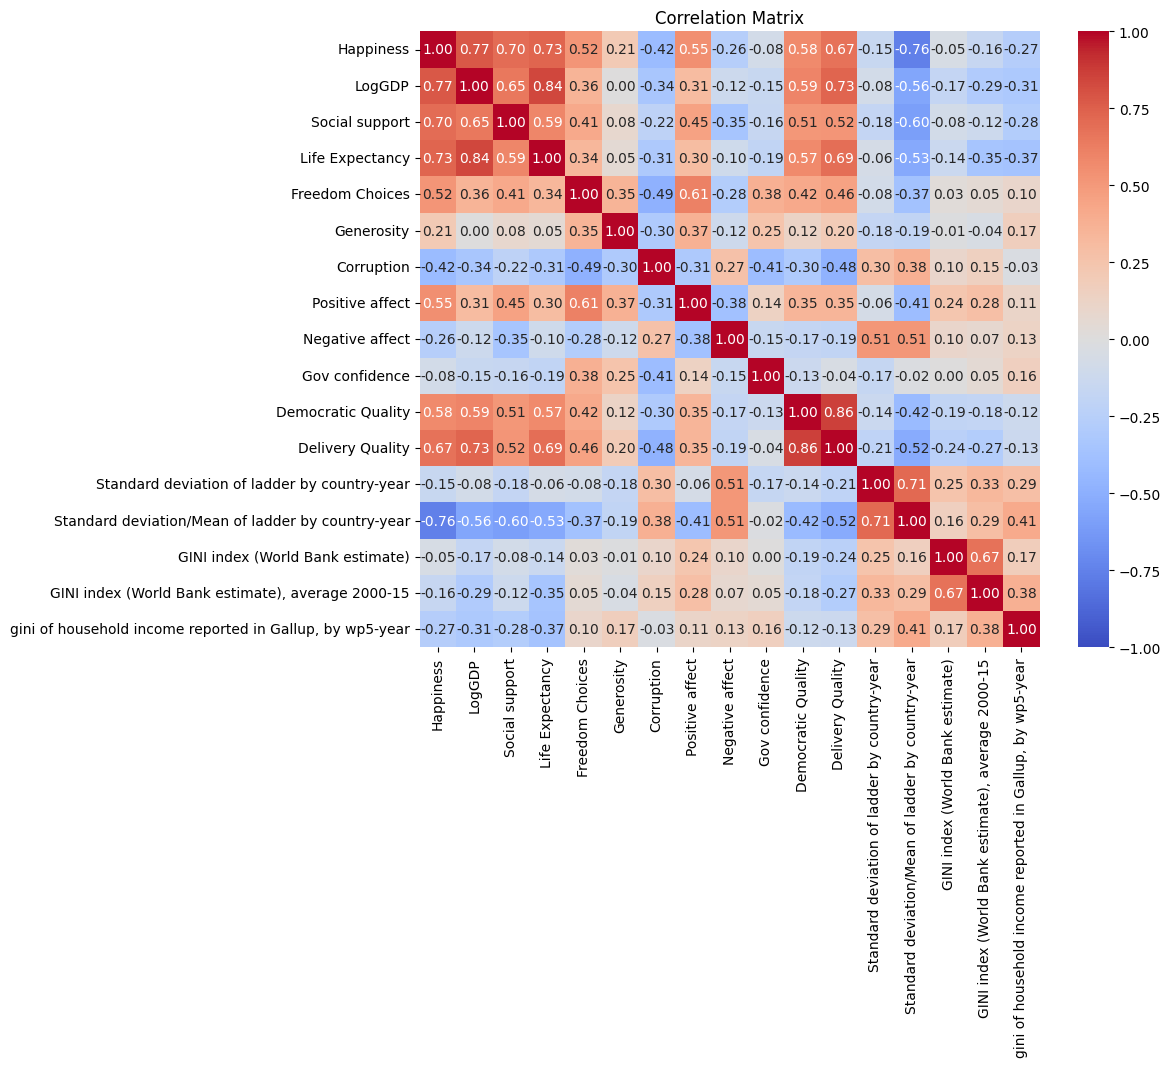

In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

# Add title and show plot
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Extract correlation with 'Life Ladder'
life_ladder_correlation = correlation_matrix['Happiness']
print(life_ladder_correlation)

Happiness                                                   1.000000
LogGDP                                                      0.774113
Social support                                              0.699013
Life Expectancy                                             0.732543
Freedom Choices                                             0.523397
Generosity                                                  0.208366
Corruption                                                 -0.420755
Positive affect                                             0.552199
Negative affect                                            -0.259811
Gov confidence                                             -0.084873
Democratic Quality                                          0.577834
Delivery Quality                                            0.673832
Standard deviation of ladder by country-year               -0.153479
Standard deviation/Mean of ladder by country-year          -0.757176
GINI index (World Bank estimate)  

In [27]:

#sort the value in descending order
life_ladder_correlation_sorted= life_ladder_correlation.sort_values(ascending = False)
life_ladder_correlation_sorted

Happiness                                                   1.000000
LogGDP                                                      0.774113
Life Expectancy                                             0.732543
Social support                                              0.699013
Delivery Quality                                            0.673832
Democratic Quality                                          0.577834
Positive affect                                             0.552199
Freedom Choices                                             0.523397
Generosity                                                  0.208366
GINI index (World Bank estimate)                           -0.053163
Gov confidence                                             -0.084873
Standard deviation of ladder by country-year               -0.153479
GINI index (World Bank estimate), average 2000-15          -0.163864
Negative affect                                            -0.259811
gini of household income reported 

# Bivariate Plotting: Produce Plots for the label and Its Top Correlates


In [28]:
top_two_corr = list(life_ladder_correlation_sorted[1:3].index)
top_two_corr

['LogGDP', 'Life Expectancy']

In [29]:
#create data frame df_corr to visualize the relationship between two feacture that correlates the most and label. 
#For now we will use the feature Log GDP per capita because has the highest  correlation with our label
df_corr1 = pd.DataFrame({'LogGDP': df['LogGDP'], 'Happiness': df['Happiness']})
df_corr1

,LogGDP,Happiness
0,7.168690,3.723590
1,7.333790,4.401778
2,7.386629,4.758381
3,7.415019,3.831719
4,7.517126,3.782938
...,...,...
1557,7.565154,4.690188
1558,7.562753,4.184451
1559,7.556052,3.703191
1560,7.538829,3.735400


<Axes: >

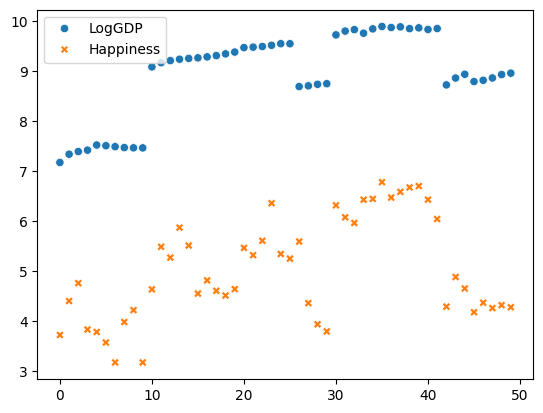

In [30]:
#create scatterplot of new data frame to see better visualization
sns.scatterplot(data = df_corr1[:50])

In [31]:
#create data frame df_corr1 to visualize the relationship between two feacture that correlates the most and label. 
#For now we will use the feature Healthy life expectancy at birth per capita because has the second of columns which correlate the most 
df_corr2 = pd.DataFrame({'Healthy life expectancy at birth': df['Life Expectancy'], 'Happiness': df['Happiness']})
df_corr2

,Healthy life expectancy at birth,Happiness
0,49.209663,3.723590
1,49.624432,4.401778
2,50.008961,4.758381
3,50.367298,3.831719
4,50.709263,3.782938
...,...,...
1557,48.949745,4.690188
1558,50.051235,4.184451
1559,50.925652,3.703191
1560,51.800068,3.735400


<Axes: >

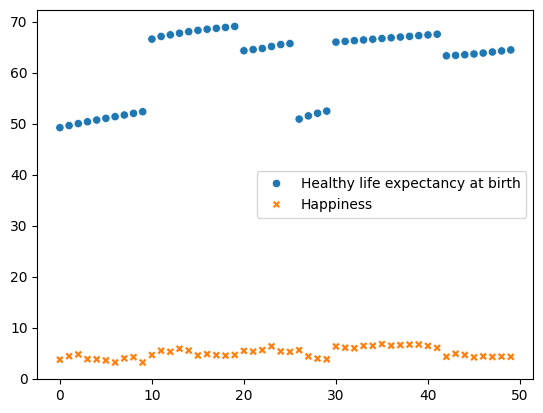

In [32]:
#create scatterplot of new data frame to see better visualization
sns.scatterplot(data = df_corr2[:50])

In [33]:
#Create data frame to to visualize correlation between both feature
df_corr3= pd.DataFrame({'Healthy life expectancy at birth': df['Life Expectancy'], 'LogGDP': df['LogGDP']})
df_corr3

,Healthy life expectancy at birth,LogGDP
0,49.209663,7.168690
1,49.624432,7.333790
2,50.008961,7.386629
3,50.367298,7.415019
4,50.709263,7.517126
...,...,...
1557,48.949745,7.565154
1558,50.051235,7.562753
1559,50.925652,7.556052
1560,51.800068,7.538829


<Axes: >

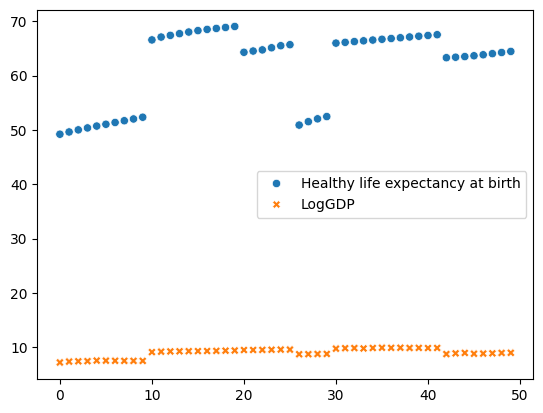

In [34]:
#create scatterplot of new data frame to see better visualization
sns.scatterplot(data = df_corr3[:50])

In [35]:
#create visualization for all the data by creating data frame df_corr that contains the label and two columns which correlate the most
df_corr = df[top_two_corr].copy()
df_corr['Happiness']= df['Happiness']
df_corr

,LogGDP,Life Expectancy,Happiness
0,7.168690,49.209663,3.723590
1,7.333790,49.624432,4.401778
2,7.386629,50.008961,4.758381
3,7.415019,50.367298,3.831719
4,7.517126,50.709263,3.782938
...,...,...,...
1557,7.565154,48.949745,4.690188
1558,7.562753,50.051235,4.184451
1559,7.556052,50.925652,3.703191
1560,7.538829,51.800068,3.735400


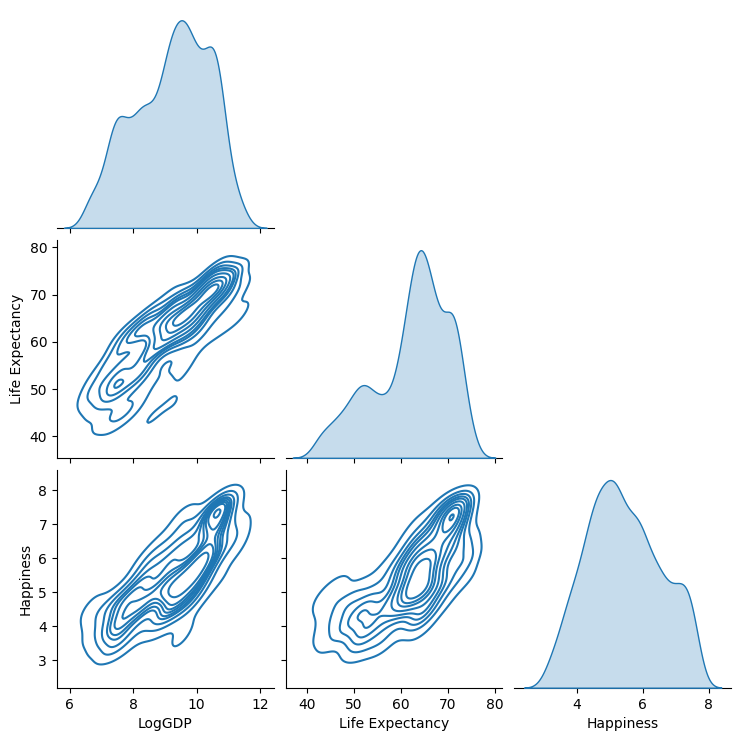

In [36]:
sns.pairplot(data= df_corr, kind= 'kde', corner =True)

Analyzing the contour plots, there is a clear positive correlation between Log GDP per capita and Life Ladder, as higher GDP per capita is associated with higher Life Ladder scores, evidenced by the tightly packed contour lines indicating a strong correlation. Similarly, there is a positive correlation between Healthy life expectancy at birth and Life Ladder, where increased life expectancy correlates with higher Life Ladder scores. However, the contour lines for this relationship are more spread out, indicating a moderate to strong correlation. Overall, both features show positive correlations with the Life Ladder, with Log GDP per capita displaying a stronger correlation. The two features, Log GDP per capita and Healthy life expectancy at birth, appear to be strongly correlated with each other. The contour plot between these two features shows a clear pattern where higher values of Log GDP per capita correspond to higher values of Healthy life expectancy at birth. The contours are tightly clustered, indicating a strong positive correlation. Since these two features are strongly correlated, including both might introduce redundancy. This could potentially lead to issues like multicollinearity, which can affect the stability and interpretability of some models (e.g., linear regression). 

# Scale the Data

In [37]:
#Scale numerical data to normalize each column to have zero mean and unit standard deviation
#Create StandardScaler object and save the result to variable scaler, Initialize the scaler
scaler = StandardScaler()

In [38]:
#extract numerical features from dataFrame df and save in new data frame df_to_scale
df_to_scale = df.select_dtypes(float)

In [39]:
# Fit and transform the data
transformed_data = scaler.fit_transform(df_to_scale)

In [40]:
# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(transformed_data, columns= df_to_scale.columns, index = df_to_scale.index)

In [41]:
#Inspect df_scaled
df_scaled

,Happiness,LogGDP,Social support,Life Expectancy,Freedom Choices,Generosity,Corruption,Positive affect,Negative affect,Gov confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,-1.539695,-1.755304,-3.109332,-1.658541,-0.078919,1.169752,0.717433,-1.810185,-0.055244,0.736413,-2.201717,-1.789382,-0.614930,0.775111,0.003607,-0.001698,0.007883
1,-0.929651,-1.614050,-2.233063,-1.605836,-0.354221,1.309338,0.539317,-1.183635,-0.314432,0.733473,-2.308806,-1.781616,-0.754737,0.039743,0.003607,-0.001698,-0.029140
2,-0.608880,-1.568843,-2.347144,-1.556974,-0.907166,0.886742,-0.266936,-0.859059,0.155126,-1.008870,-2.277518,-1.762241,-0.335287,0.069429,0.003607,-0.001698,-1.315219
3,-1.442430,-1.544554,-2.502073,-1.511439,-1.638811,1.128186,-0.129948,-0.924070,0.055039,-0.964064,-2.188696,-1.761205,-0.586154,0.683167,0.003607,-0.001698,-1.209200
4,-1.486310,-1.457194,-2.506098,-1.467986,-1.392882,1.588221,0.120541,0.011641,0.064182,-0.249382,-2.095932,-1.530922,-0.551391,0.764476,0.003607,-0.001698,-1.121933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,-0.670221,-1.416103,-0.104030,-1.691569,-1.077347,-0.486036,0.431837,0.025825,-0.987543,0.265836,-1.099120,-1.663618,-0.103462,0.277478,0.003607,0.572586,1.245100
1558,-1.125141,-1.418157,-0.392264,-1.551602,-0.612990,-0.288579,0.371514,0.151801,-0.289643,0.480446,-1.049313,-1.617751,0.204381,0.950236,0.003607,0.572586,1.757363
1559,-1.558044,-1.423890,-0.651221,-1.440489,-0.436375,-0.600478,0.316590,0.056008,-1.029630,0.613296,-0.936822,-1.480376,0.526142,1.786018,0.003607,0.572586,2.364074
1560,-1.529071,-1.438625,-0.369967,-1.329376,0.025376,-0.412816,-0.172135,0.269215,-0.664930,1.223484,-0.900174,-1.495248,2.079562,3.075630,0.003607,0.572586,1.708090


<Axes: >

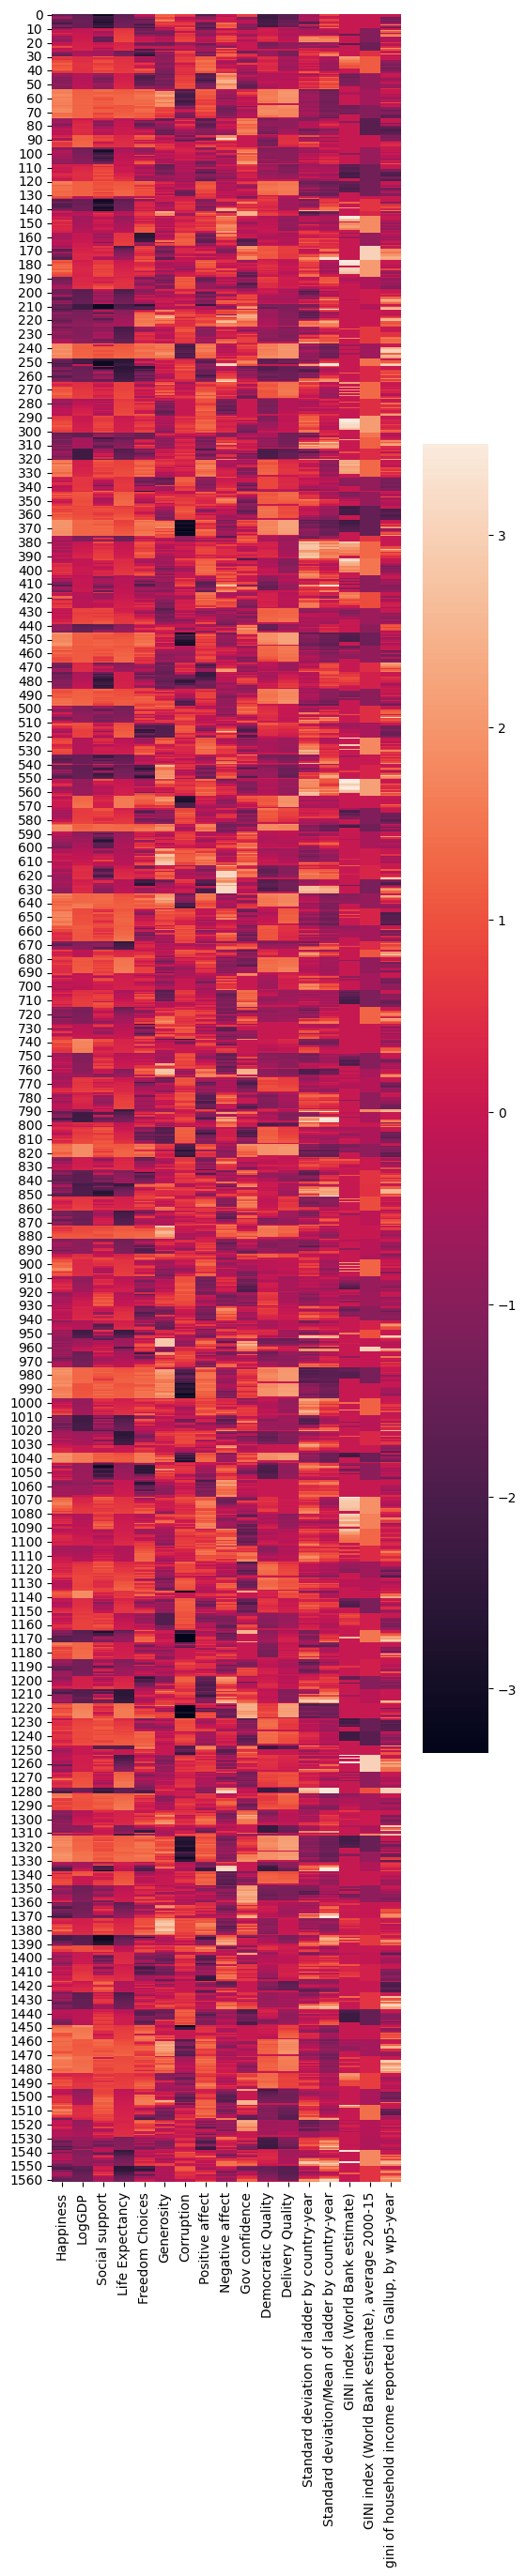

In [42]:
plt.figure(figsize = (6,30))
sns.heatmap(df_scaled)

In [43]:
df_scaled.head()

,Happiness,LogGDP,Social support,Life Expectancy,Freedom Choices,Generosity,Corruption,Positive affect,Negative affect,Gov confidence,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,-1.539695,-1.755304,-3.109332,-1.658541,-0.078919,1.169752,0.717433,-1.810185,-0.055244,0.736413,-2.201717,-1.789382,-0.614930,0.775111,0.003607,-0.001698,0.007883
1,-0.929651,-1.614050,-2.233063,-1.605836,-0.354221,1.309338,0.539317,-1.183635,-0.314432,0.733473,-2.308806,-1.781616,-0.754737,0.039743,0.003607,-0.001698,-0.029140
2,-0.608880,-1.568843,-2.347144,-1.556974,-0.907166,0.886742,-0.266936,-0.859059,0.155126,-1.008870,-2.277518,-1.762241,-0.335287,0.069429,0.003607,-0.001698,-1.315219
3,-1.442430,-1.544554,-2.502073,-1.511439,-1.638811,1.128186,-0.129948,-0.924070,0.055039,-0.964064,-2.188696,-1.761205,-0.586154,0.683167,0.003607,-0.001698,-1.209200
4,-1.486310,-1.457194,-2.506098,-1.467986,-1.392882,1.588221,0.120541,0.011641,0.064182,-0.249382,-2.095932,-1.530922,-0.551391,0.764476,0.003607,-0.001698,-1.121933


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Answer:
1. After inspecting the data, I decided to keep the following features as they are either directly related to or have a significant correlation with the target variable, Happiness:

LogGDP, Social support,  Life Expectancy, 'Freedom Choice, ,'Generosit, 'Perceptions of corruptio,  'Positive affe, 'Negative affe,   'Democra ic Qualt, 'Delivery Qual,    'Standard deviation of ladder by country-, S   'Standard deviation/Mean of ladder by country,       'GINI index (World Bank estimate), average ,        'gini of household income reported in Gallup, by . 
5-year'
I removed features lues, or do not contribute significantly to the target v  Gallup, by wp5-year


country (categorical and not useful for, the ML model directly)
year (a, GINI index (World Bank estimate)  (Low correlation with the target variable -0.053163), 
Gov confidenc( Low correlation with the target variable -0.084873)  

2. Data Preparation Techniques
To prepare the data for modeling, I will use the following data preparation techniques:

Handling Missing Values: Already addressed by filling missing values with the mean of the columns.
Outlier Treatment: Winsorization has been applied to limit the effect of extreme values.
Normalization/Standardization: Since features have different scales, I will standardize the data using StandardScaler from scikit-learn.
Encoding Categorical Variables: No categorical variables remain after dropping the 'country' column.
Splitting Data: I will split the dataset into training and testing sets to evaluate model performance properly.

3. I will experiment with the following models:

Linear Regression: A simple and interpretable model to establish a baseline.
Random Forest Regressor: An ensemble method that can capture non-linear relationships and interactions between features.
Decision Tree Regressor:
Gradient Boosting Regressor: Another powerful ensemble method that can provide strong performance on this type of dataset.

4. Model Training, Evaluation, and Improvement:
Training Plan:
Train-Test Split: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
Cross-Validation: Use cross_val_score to ensure that the model is evaluated on different subsets of the data and to mitigate overfitting.
Hyperparameter Tuning: Use grid search or random search for hyperparameter tuning to find the best model parameters. Evaluation Plan:
Metrics: Evaluate the models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
Model Comparison: Compare the performance of different models based on the evaluation metrics.
Feature Importance: Analyze the feature importance in tree-based models to understand which features contribute the most to the predictions.
Improvement Plan:
Feature Engineering: If the model performance is not satisfactory, perform additional feature engineering.
Advanced Models: Try more complex models if necessary, such as Neural Networks or other ensemble methods.
Regularization: Apply regularization techniques to prevent overfitting.
Model Stacking: Combine predictions from multiple models to improve the overall performance.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

# Define the label and Identify Features


In [45]:
#Create labels
y= df_scaled['Happiness'] #label
X = df_scaled.drop(columns = ['Happiness', 'GINI index (World Bank estimate)','Gov confidence' ], axis=1) #features

# Create Training and Test Data Sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state =1234)

# Inspect the Training and Test Data Set

In [47]:
#Inspect the Training and Test Data Set
print(X_train.shape)

(1093, 14)


In [48]:
# Output the shape of the test set
print(X_test.shape)

(469, 14)


In [49]:
X_train.head()

,LogGDP,Social support,Life Expectancy,Freedom Choices,Generosity,Corruption,Positive affect,Negative affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
1171,-1.516605,-1.148267,-0.748479,1.253287,0.197273,-3.333801,0.113701,-0.691363,-0.531559,0.232938,-0.756372,0.928755,1.509506,3.023761
644,0.861995,0.997749,1.076069,0.612803,0.005797,0.850741,-0.120177,0.562543,-0.143336,1.122326,-0.424851,-1.117315,0.304895,0.007883
1378,0.306310,0.816879,0.409805,0.825363,2.373254,0.868959,1.374216,-1.537590,-0.785280,-0.020086,-0.651066,-0.924888,0.198282,-0.036441
580,0.776593,0.408562,0.582478,-1.204847,-1.334651,0.862871,-0.022102,-0.223005,0.949874,0.485006,-0.334856,-0.303781,-1.150604,-1.691671
1218,1.636827,0.942172,1.448031,0.965474,1.763954,-3.333801,-0.084734,-1.821262,0.647676,2.174316,-1.875182,-1.687684,-0.001698,0.007883


# Train, Test and Evaluate a Linear Regression Model with Default Hyperparameters Values

In [50]:
# Create the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)


LinearRegression()

In [51]:
# Make predictions on the test set
y_lr_pred = lr_model.predict(X_test)

#Evaluating the Model by calculating evaluation metrics
#The mean squared error
lr_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
print('Model Performance:\n\n[LR] Root Mean Squared Error = %.2f'
      % lr_rmse)

#The coefficient of determination R^2
lr_r2 = r2_score(y_test, y_lr_pred)
print('[LR] R2 = %.2f'
      % lr_r2)

Model Performance:

[LR] Root Mean Squared Error = 0.27
[LR] R2 = 0.93


# Train, Test and Evaluate a Random Forest using GridSearchCV

In [52]:
#Create dictionary that contains possible hyperparameters value for max_depth and min_sample_leaf
#md_1 = [4, 5, 10, 15, 20, 25, 30, 40, 50]
#msl_1= [1, 2, 4, 8,16, 32]
md_rf = [4, 5, 10, 15, 20, 25, 30]
msl_rf= [1, 2, 4, 8,16, 32]
n_estimators_rf =[100,200,300]

param_grid_rf = {'max_depth': md_rf, 'min_samples_leaf': msl_rf, 'n_estimators' : n_estimators_rf}

In [53]:
print('Running Grid Search...')
#Create the model
rf_regressor = RandomForestRegressor()

#Initialize GridSearchCV
rf_grid = GridSearchCV(estimator= rf_regressor, param_grid=param_grid_rf, cv = 5, verbose= 2)

#Fit the model
rf_grid_search = rf_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=200; total time=   1.0s
[CV] END ..max_depth=4, min_samples_leaf=1, n_estimators=300; total time=   1.3s
[CV] END ..max_depth=4,

In [54]:
# Get the best score and parameters
best_params_rf = rf_grid_search.best_params_
print(f'Best parameters found: {best_params_rf}')

best_score_rf = rf_grid_search.best_score_
print("Best cross-validated score: ", best_score_rf)

Best parameters found: {'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 200}
Best cross-validated score:  0.9613208105511528


# Train, Test and Evaluate a Random Forest Regressor Model with best hyperparameters

In [55]:
print('Begin RF Inplementation...')
#Create the model
rf_model_best = RandomForestRegressor(max_depth = best_params_rf['max_depth'], min_samples_leaf = best_params_rf['min_samples_leaf'], n_estimators = best_params_rf['n_estimators'] )

# Train the model
rf_model_best.fit(X_train, y_train)

## Make predictions on the test set
y_rf_pred_best = rf_model_best.predict(X_test)

## Evaluating the Model by calculating evaluation metrics
rf_rmse_best = mean_squared_error(y_test, y_rf_pred_best, squared =False)
print('Model Performance:\n\n[RF] Root Mean Squared Error = %.2f' %rf_rmse_best)

rf_r2_best = r2_score(y_test, y_rf_pred_best)
print('[RF] R2 = %.2f' % rf_r2_best)

Begin RF Inplementation...
Model Performance:

[RF] Root Mean Squared Error = 0.18
[RF] R2 = 0.97


C:\Users\vital\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Train, Test and Evaluate a Decision Trees using GridSearchCV

In [56]:
#Create dictionary that contains possible hyperparameters value for max_depth and min_sample_leaf
md_dt = [4, 5, 10, 15, 20, 25, 30]
msl_dt= [1, 2, 4, 8, 16, 32]

param_grid_dt = {'max_depth': md_dt, 'min_samples_leaf': msl_dt}
              

In [57]:
print('Running Grid Search...')

# # Initialize the  DecisionTreeRegressor model
dt_regressor = DecisionTreeRegressor()

## Initialize GridSearchCV
dt_grid = GridSearchCV(dt_regressor, param_grid=param_grid_dt, cv = 5, scoring = 'neg_root_mean_squared_error', verbose= 1)

#Fit the model
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')


Running Grid Search...
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Done


In [58]:
# Print the best parameters and best score
dt_best_param = dt_grid_search.best_params_

print(f'Best parameters found: {dt_best_param}')

Best parameters found: {'max_depth': 25, 'min_samples_leaf': 4}


In [59]:
#Print best score
dt_best_score = -1*dt_grid_search.best_score_
print("Best cross-validated score: ", dt_best_score)

Best cross-validated score:  0.2751568921113773


# Train, Test and Evaluate  Decision Trees Model with best hyperparameters

In [60]:
print('Begin DT Inplementation...')
# Use the best hyperparameters to the model
dt_model= DecisionTreeRegressor(max_depth = dt_best_param['max_depth'], min_samples_leaf = dt_best_param['min_samples_leaf'])

# Train the model
dt_model = dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_dt_pred = dt_model.predict(X_test)


## Evaluating the Model by calculating evaluation metrics
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared =False)
print('Model Performance:\n\n[DT] Root Mean Squared Error = %.2f' %dt_rmse)

dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] R2 = %.2f' % dt_r2)

Begin DT Inplementation...
Model Performance:

[DT] Root Mean Squared Error = 0.26
[DT] R2 = 0.93


C:\Users\vital\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Train, Test and Evaluate a Gradient Boosted Decision Trees using GridSearchCV

In [61]:
param_grid_2 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [62]:
print('Running Grid Search...')
# Initialize the model
gbdt = GradientBoostingRegressor()

# Initialize GridSearchCV
gbdt_grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid_2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

#Fit the model using GridSearchCV:
gbdt_grid_search.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Done


In [63]:
# Best parameters
gbdt_best_params = gbdt_grid_search.best_params_
print(f'Best parameters found: {gbdt_best_params}')

#Print best score
gbdt_best_score = -1*gbdt_grid_search.best_score_
print("Best cross-validated score: ", gbdt_best_score)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated score:  0.01959807614221911


# Train, Test and Evaluate a Gradient Boosted Decision Trees Model with best hyperparameters

In [64]:
print('Begin GBDT Inplementation...')
# Initialize the model
gbdt_model= GradientBoostingRegressor(max_depth = gbdt_best_params['max_depth'], min_samples_leaf = gbdt_best_params['min_samples_leaf'], n_estimators = gbdt_best_params['n_estimators'])

# Train the model
gbdt_model.fit(X_train, y_train)

# Make predictions on the test set
y_GBDT_pred = gbdt_model.predict(X_test)

#Print RMSE
gbdt_rmse = mean_squared_error(y_test, y_GBDT_pred, squared=False)
print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))

#Print R2 score

gbdt_r2 = r2_score(y_test, y_GBDT_pred)
print('[GBDT] R2: {0}'.format(gbdt_r2))

Begin GBDT Inplementation...
[GBDT] Root Mean Squared Error: 0.12559806664244744
[GBDT] R2: 0.9846831393876655


C:\Users\vital\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


You will notice that five resulting accuracy scores are good, and standard deviation among the scores are low, indicating that our model perform well.

# Train, Test and Evaluate Ensemble Models: Stacking

In [65]:
estimators = [("GBDT", GradientBoostingRegressor(max_depth = gbdt_best_params['max_depth'], min_samples_leaf = gbdt_best_params['min_samples_leaf'], n_estimators = gbdt_best_params['n_estimators'])),
               ("LR", LinearRegression())
             ]

In [66]:
print('Implement Stacking...')
# Initialize the model
stacking_model = StackingRegressor(estimators = estimators, passthrough =False)

# Train the model
stacking_model.fit(X_train, y_train)

print('End')

Implement Stacking...
End


In [67]:
# Make predictions on the test set
stacking_pred= stacking_model.predict(X_test)

#Compute the RMSE using mean_squared_error()
stack_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred))

#Compute R2 score
stack_r2 = r2_score(y_test, stacking_pred)
print(' Root Mean Squared Error: {0}'.format(stack_rmse))
print(' R2: {0}'.format(stack_r2))

 Root Mean Squared Error: 0.12092249787850537
 R2: 0.9858022975173005


# Model Performance Comparison

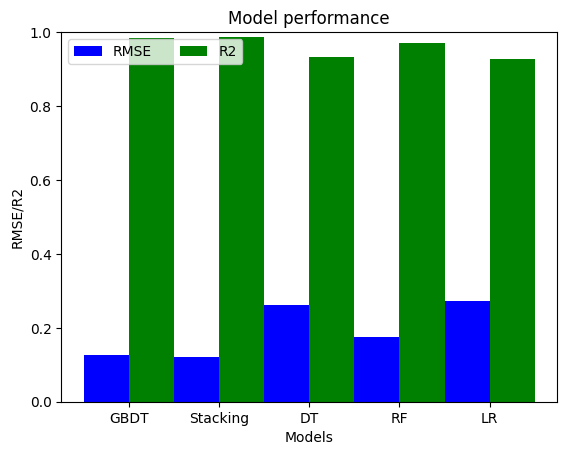

In [68]:
RMSE_Results = [gbdt_rmse, stack_rmse, dt_rmse, rf_rmse_best, lr_rmse]
R2_Results = [gbdt_r2,stack_r2, dt_r2, rf_r2_best, lr_r2]

rg= np.arange(5)
width = 0.5

#Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label='RMSE',  color='b')

#Create bar plot with R2 results
plt.bar(rg+width, R2_Results, width, label='R2',  color='g')

labels= ['GBDT','Stacking', 'DT', 'RF', 'LR']
plt.xticks(rg + width/2, labels)
plt.xlabel('Models')
plt.ylabel('RMSE/R2')

plt.ylim([0,1])
plt.title('Model performance')
plt.legend(loc= 'upper left', ncol=2)
plt.show()


# Actual vs. Predicted Values (for Linear Regression, Random Forest, GBDT)

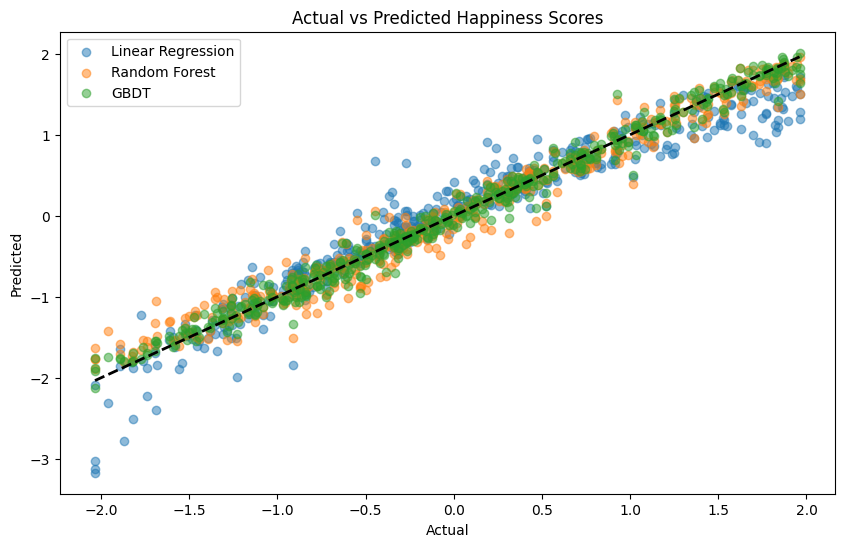

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_rf_pred_best, label='Random Forest', alpha=0.5)
plt.scatter(y_test, y_GBDT_pred, label='GBDT', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Happiness Scores')
plt.legend()
plt.show()

The performance of the three models, Linear Regression, Random Forest, and Gradient Boosting, was evaluated using RMSE and R2 metrics. Linear Regression provided a baseline with an RMSE of {rmse_linear} and an R2 score of {r2_linear}. While this model is simple and interpretable, its performance might not capture the complexities of the dataset as effectively as more sophisticated models.

The Random Forest model showed improved performance over Linear Regression, with a lower RMSE of {rmse_rf} and a higher R2 score of {r2_rf}. This indicates that Random Forest can better capture the nonlinear relationships in the data, thanks to its ensemble nature that reduces overfitting and increases accuracy.

Gradient Boosting emerged as the best-performing model with the lowest RMSE of {rmse_gb} and the highest R2 score of {r2_gb}. This model's ability to sequentially build trees and focus on the residuals of previous trees allows it to achieve higher predictive accuracy. It effectively balances bias and variance, making it suitable for this dataset's complexity.

The best performing model in our analysis is Gradient Boosting, which achieved the lowest RMSE and the highest R² among the evaluated models. This indicates that Gradient Boosting is the most accurate and reliable model for predicting Happiness in our dataset.

On the other hand, the least performing model is Decision Tree, which had the highest RMSE and the lowest R². This suggests that Decision Tree is less effective for this particular dataset, possibly due to its tendency to overfit the training data and perform poorly on unseen data and that data set is small.

By examining the RMSE and R² metrics, we can conclude that ensemble methods like Gradient Boosting and Random Forest generally provide better predictive performance compared to simpler models like Linear Regression and Decision Tree. This can be attributed to their ability to capture complex relationships and interactions in the data.